In [44]:
import pandas as pd
import joblib
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

In [45]:
ruta = "P1"

In [46]:
# Importar DataFrames
X_test = pd.read_parquet(f"data/{ruta}/X_test.parquet")
y_test = pd.read_parquet(f"data/{ruta}/y_test.parquet")
X_val = pd.read_parquet(f"data/{ruta}/X_val.parquet")
y_val = pd.read_parquet(f"data/{ruta}/y_val.parquet")
X_test_pca = pd.read_parquet(f"data/{ruta}/X_test_pca.parquet")
X_val_pca = pd.read_parquet(f"data/{ruta}/X_val_pca.parquet")

In [47]:
# Importar modelo Random Forest
rf = joblib.load(f"models/{ruta}/rf.pkl")

# Importar modelo Rotation Forest
clf = joblib.load(f"models/{ruta}/clf.pkl")

# Importar modelo ANN
ann = load_model(f"models/{ruta}/ann.h5")

In [48]:
# Importar modelo Random Forest val
rf_pca = joblib.load(f"models/{ruta}/rf_pca.pkl")

# Importar modelo Rotation Forest val
clf_pca = joblib.load(f"models/{ruta}/clf_pca.pkl")

# Importar modelo ANN val
ann_pca = load_model(f"models/{ruta}/ann_pca.h5")

# Sin PCA

#

# Random forest

In [49]:
y_pred_RanF = rf.predict(X_test)
y_pred_RanF_val = rf.predict(X_val)

Test data

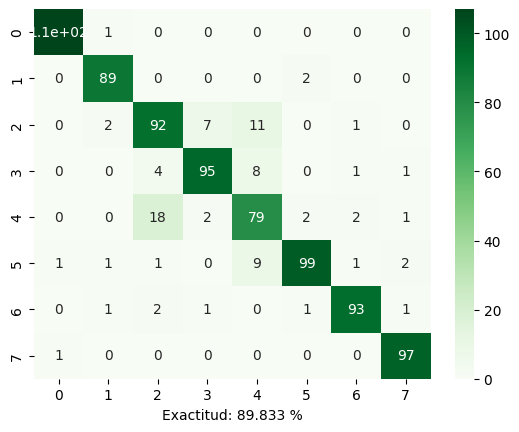

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.95      0.98      0.96        91
           3       0.79      0.81      0.80       113
           4       0.90      0.87      0.89       109
           6       0.74      0.76      0.75       104
           9       0.95      0.87      0.91       114
          10       0.95      0.94      0.94        99
          11       0.95      0.99      0.97        98

    accuracy                           0.90       836
   macro avg       0.90      0.90      0.90       836
weighted avg       0.90      0.90      0.90       836



In [50]:
sns.heatmap(confusion_matrix(y_pred_RanF, y_test),cmap="Greens",annot=True)
plt.xlabel(f'Exactitud: {round(100*accuracy_score(y_pred_RanF, y_test),3)} %')
plt.show()
print(classification_report(y_pred_RanF, y_test))

Validation data

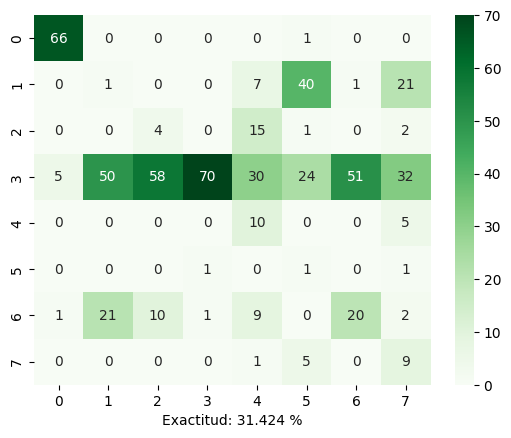

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        67
           1       0.01      0.01      0.01        70
           3       0.06      0.18      0.09        22
           4       0.97      0.22      0.36       320
           6       0.14      0.67      0.23        15
           9       0.01      0.33      0.03         3
          10       0.28      0.31      0.29        64
          11       0.12      0.60      0.21        15

    accuracy                           0.31       576
   macro avg       0.31      0.41      0.27       576
weighted avg       0.69      0.31      0.36       576



In [51]:
sns.heatmap(confusion_matrix(y_pred_RanF_val, y_val),cmap="Greens",annot=True)
plt.xlabel(f'Exactitud: {round(100*accuracy_score(y_pred_RanF_val, y_val),3)} %')
plt.show()
print(classification_report(y_pred_RanF_val, y_val))

# Rotation forest

In [52]:
y_pred_RotF = clf.predict(X_test)
y_pred_RotF_val = clf.predict(X_val)

Test data

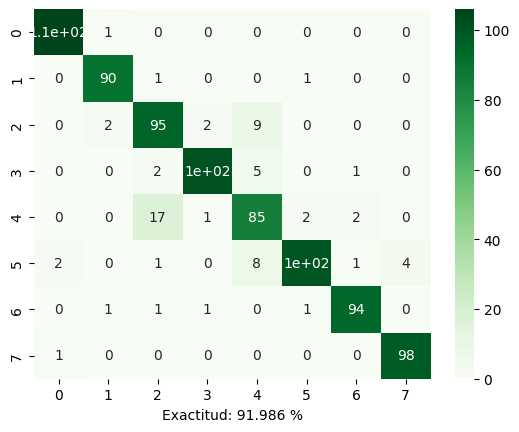

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.96      0.98      0.97        92
           3       0.81      0.88      0.84       108
           4       0.96      0.93      0.94       109
           6       0.79      0.79      0.79       107
           9       0.96      0.86      0.91       116
          10       0.96      0.96      0.96        98
          11       0.96      0.99      0.98        99

    accuracy                           0.92       836
   macro avg       0.92      0.92      0.92       836
weighted avg       0.92      0.92      0.92       836



In [53]:
sns.heatmap(confusion_matrix(y_pred_RotF, y_test),cmap="Greens",annot=True)
plt.xlabel(f'Exactitud: {round(100*accuracy_score(y_pred_RotF, y_test),3)} %')
plt.show()
print(classification_report(y_pred_RotF, y_test))

Validation data

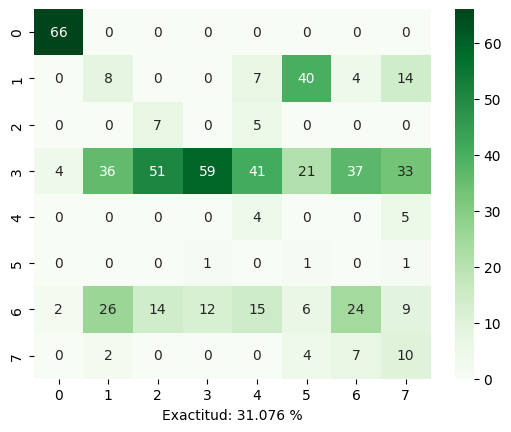

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        66
           1       0.11      0.11      0.11        73
           3       0.10      0.58      0.17        12
           4       0.82      0.21      0.33       282
           6       0.06      0.44      0.10         9
           9       0.01      0.33      0.03         3
          10       0.33      0.22      0.27       108
          11       0.14      0.43      0.21        23

    accuracy                           0.31       576
   macro avg       0.31      0.42      0.27       576
weighted avg       0.59      0.31      0.35       576



In [54]:
sns.heatmap(confusion_matrix(y_pred_RotF_val, y_val),cmap="Greens",annot=True)
plt.xlabel(f'Exactitud: {round(100*accuracy_score(y_pred_RotF_val, y_val),3)} %')
plt.show()
print(classification_report(y_pred_RotF_val, y_val))

# Artificial Neural Networks (ANN)

In [55]:
original_labels = [0, 1, 3, 4, 6, 9, 10, 11]

# Predicción y decodificación
y_pred_probs = ann.predict(X_test)
y_pred_ann_e = np.argmax(y_pred_probs, axis=1)
y_pred_ann = [original_labels[i] for i in y_pred_ann_e]

# Predicción y decodificación
y_pred_probs_val = ann.predict(X_val)
y_pred_ann_e_val = np.argmax(y_pred_probs_val, axis=1)
y_pred_ann_val = [original_labels[i] for i in y_pred_ann_e_val]

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step


Test data

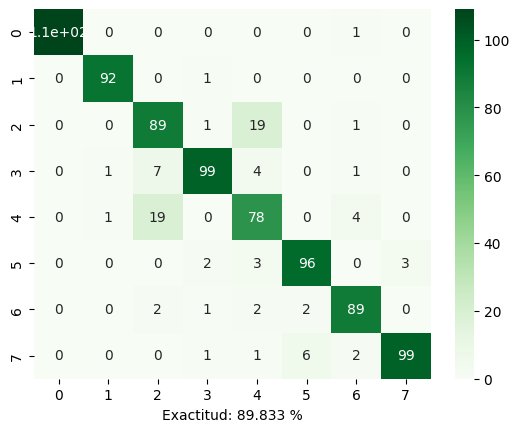

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       110
           1       0.98      0.99      0.98        93
           3       0.76      0.81      0.78       110
           4       0.94      0.88      0.91       112
           6       0.73      0.76      0.75       102
           9       0.92      0.92      0.92       104
          10       0.91      0.93      0.92        96
          11       0.97      0.91      0.94       109

    accuracy                           0.90       836
   macro avg       0.90      0.90      0.90       836
weighted avg       0.90      0.90      0.90       836



In [56]:
sns.heatmap(confusion_matrix(y_pred_ann, y_test, labels=original_labels),cmap="Greens",annot=True)
plt.xlabel(f'Exactitud: {round(100*accuracy_score(y_pred_ann, y_test),3)} %')
plt.show()
print(classification_report(y_pred_ann, y_test))

Validation data

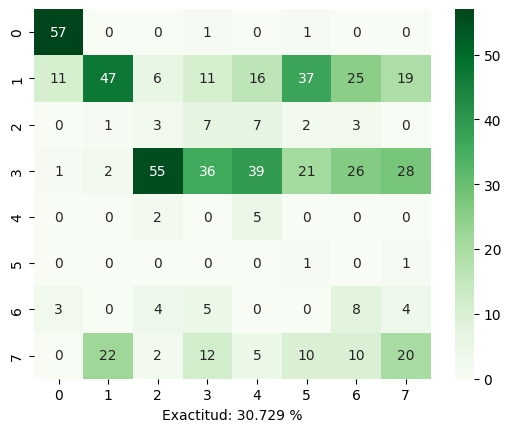

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        59
           1       0.65      0.27      0.39       172
           3       0.04      0.13      0.06        23
           4       0.50      0.17      0.26       208
           6       0.07      0.71      0.13         7
           9       0.01      0.50      0.03         2
          10       0.11      0.33      0.17        24
          11       0.28      0.25      0.26        81

    accuracy                           0.31       576
   macro avg       0.31      0.42      0.27       576
weighted avg       0.50      0.31      0.34       576



In [57]:
sns.heatmap(confusion_matrix(y_pred_ann_val, y_val, labels=original_labels),cmap="Greens",annot=True)
plt.xlabel(f'Exactitud: {round(100*accuracy_score(y_pred_ann_val, y_val),3)} %')
plt.show()
print(classification_report(y_pred_ann_val, y_val))

# Con PCA

#

# Random forest

In [58]:
y_pred_RanF_pca = rf_pca.predict(X_test_pca)
y_pred_RanF_pca_val = rf_pca.predict(X_val_pca)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Test data

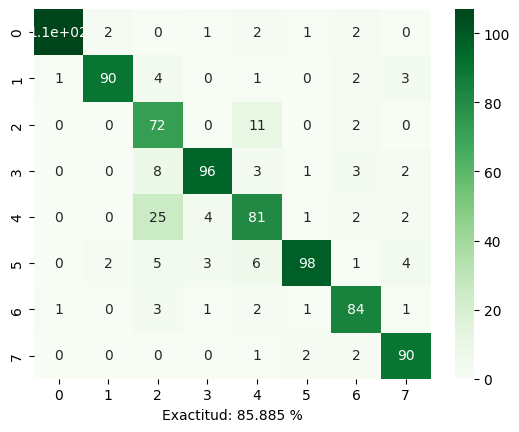

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       115
           1       0.96      0.89      0.92       101
           3       0.62      0.85      0.71        85
           4       0.91      0.85      0.88       113
           6       0.76      0.70      0.73       115
           9       0.94      0.82      0.88       119
          10       0.86      0.90      0.88        93
          11       0.88      0.95      0.91        95

    accuracy                           0.86       836
   macro avg       0.86      0.86      0.86       836
weighted avg       0.87      0.86      0.86       836



In [59]:
sns.heatmap(confusion_matrix(y_pred_RanF_pca, y_test),cmap="Greens",annot=True)
plt.xlabel(f'Exactitud: {round(100*accuracy_score(y_pred_RanF_pca, y_test),3)} %')
plt.show()
print(classification_report(y_pred_RanF_pca, y_test))

Validation data

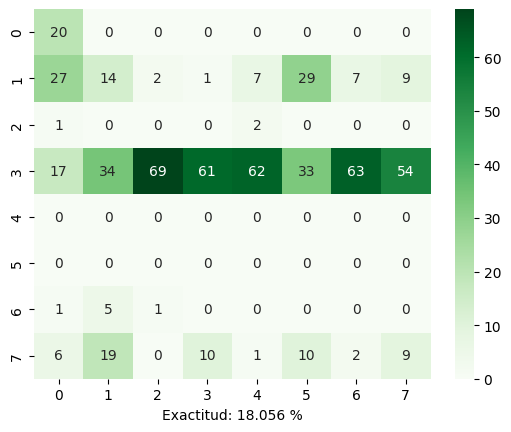

              precision    recall  f1-score   support

           0       0.28      1.00      0.43        20
           1       0.19      0.15      0.17        96
           3       0.00      0.00      0.00         3
           4       0.85      0.16      0.26       393
           6       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         7
          11       0.12      0.16      0.14        57

    accuracy                           0.18       576
   macro avg       0.18      0.18      0.13       576
weighted avg       0.63      0.18      0.24       576



c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [60]:
sns.heatmap(confusion_matrix(y_pred_RanF_pca_val, y_val),cmap="Greens",annot=True)
plt.xlabel(f'Exactitud: {round(100*accuracy_score(y_pred_RanF_pca_val, y_val),3)} %')
plt.show()
print(classification_report(y_pred_RanF_pca_val, y_val))

# Rotation forest

In [61]:
y_pred_RotF_pca = clf_pca.predict(X_test_pca)
y_pred_RotF_pca_val = clf_pca.predict(X_val_pca)

Test data

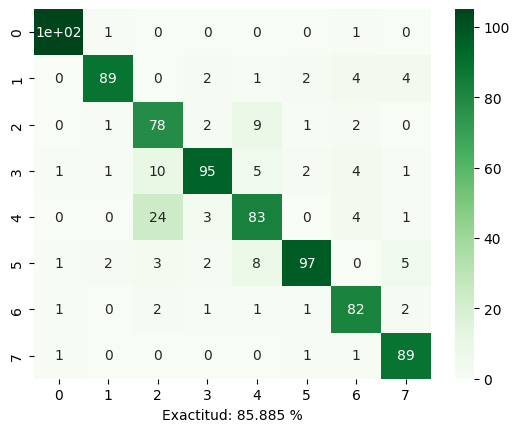

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       107
           1       0.95      0.87      0.91       102
           3       0.67      0.84      0.74        93
           4       0.90      0.80      0.85       119
           6       0.78      0.72      0.75       115
           9       0.93      0.82      0.87       118
          10       0.84      0.91      0.87        90
          11       0.87      0.97      0.92        92

    accuracy                           0.86       836
   macro avg       0.86      0.86      0.86       836
weighted avg       0.87      0.86      0.86       836



In [62]:
sns.heatmap(confusion_matrix(y_pred_RotF_pca, y_test),cmap="Greens",annot=True)
plt.xlabel(f'Exactitud: {round(100*accuracy_score(y_pred_RotF_pca, y_test),3)} %')
plt.show()
print(classification_report(y_pred_RotF_pca, y_test))

Validation data

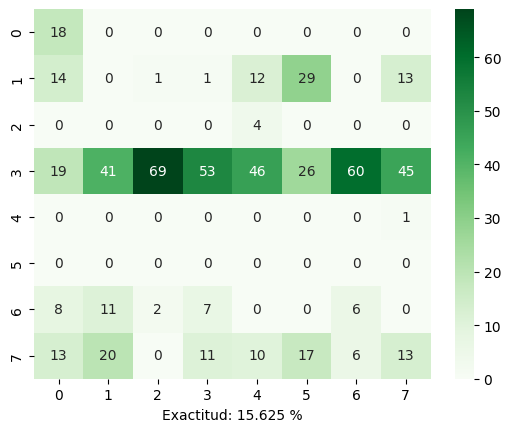

              precision    recall  f1-score   support

           0       0.25      1.00      0.40        18
           1       0.00      0.00      0.00        70
           3       0.00      0.00      0.00         4
           4       0.74      0.15      0.25       359
           6       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.08      0.18      0.11        34
          11       0.18      0.14      0.16        90

    accuracy                           0.16       576
   macro avg       0.16      0.18      0.11       576
weighted avg       0.50      0.16      0.20       576



c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [63]:
sns.heatmap(confusion_matrix(y_pred_RotF_pca_val, y_val),cmap="Greens",annot=True)
plt.xlabel(f'Exactitud: {round(100*accuracy_score(y_pred_RotF_pca_val, y_val),3)} %')
plt.show()
print(classification_report(y_pred_RotF_pca_val, y_val))

# Artificial Neural Networks (ANN)

In [64]:
original_labels = [0, 1, 3, 4, 6, 9, 10, 11]

# Predicción y decodificación
y_pred_probs = ann_pca.predict(X_test_pca)
y_pred_ann_e = np.argmax(y_pred_probs, axis=1)
y_pred_ann_pca = [original_labels[i] for i in y_pred_ann_e]

# Predicción y decodificación
y_pred_probs_val = ann_pca.predict(X_val_pca)
y_pred_ann_e_val = np.argmax(y_pred_probs_val, axis=1)
y_pred_ann_pca_val = [original_labels[i] for i in y_pred_ann_e_val]

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step


Test data

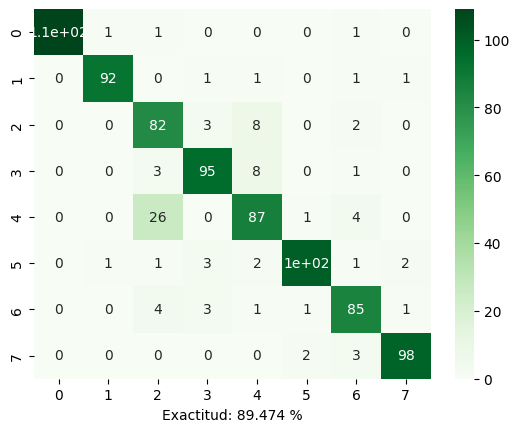

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       112
           1       0.98      0.96      0.97        96
           3       0.70      0.86      0.77        95
           4       0.90      0.89      0.90       107
           6       0.81      0.74      0.77       118
           9       0.96      0.91      0.93       110
          10       0.87      0.89      0.88        95
          11       0.96      0.95      0.96       103

    accuracy                           0.89       836
   macro avg       0.90      0.90      0.90       836
weighted avg       0.90      0.89      0.90       836



In [65]:
sns.heatmap(confusion_matrix(y_pred_ann_pca, y_test),cmap="Greens",annot=True)
plt.xlabel(f'Exactitud: {round(100*accuracy_score(y_pred_ann_pca, y_test),3)} %')
plt.show()
print(classification_report(y_pred_ann_pca, y_test))

Validation data

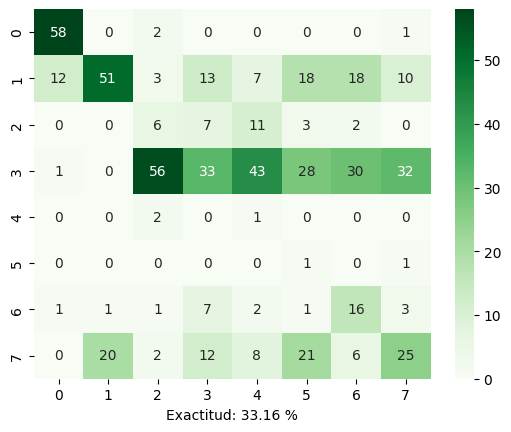

              precision    recall  f1-score   support

           0       0.81      0.95      0.87        61
           1       0.71      0.39      0.50       132
           3       0.08      0.21      0.12        29
           4       0.46      0.15      0.22       223
           6       0.01      0.33      0.03         3
           9       0.01      0.50      0.03         2
          10       0.22      0.50      0.31        32
          11       0.35      0.27      0.30        94

    accuracy                           0.33       576
   macro avg       0.33      0.41      0.30       576
weighted avg       0.50      0.33      0.37       576



In [66]:
sns.heatmap(confusion_matrix(y_pred_ann_pca_val, y_val),cmap="Greens",annot=True)
plt.xlabel(f'Exactitud: {round(100*accuracy_score(y_pred_ann_pca_val, y_val),3)} %')
plt.show()
print(classification_report(y_pred_ann_pca_val, y_val))